<a href="https://colab.research.google.com/github/aminramezani345/Text-Information-Extraction/blob/main/Text_classification_IMDB00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code is fully described in: https://www.tensorflow.org/hub/tutorials/tf2_text_classification 

# Setup

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")



```

```

# Download the IMDB dataset


In [3]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# Explore the data

In [ ]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))
print(train_examples[:10])
print(train_labels[:10])


#Build a model

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

#Create a validation set

In [13]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#Train the model

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
30/30 [==============================] - 46s 2s/step - loss: 0.5000 - accuracy: 0.8131 - val_loss: 0.4660 - val_accuracy: 0.8185
Epoch 2/5
30/30 [==============================] - 47s 2s/step - loss: 0.3756 - accuracy: 0.8743 - val_loss: 0.3806 - val_accuracy: 0.8473
Epoch 3/5
30/30 [==============================] - 44s 1s/step - loss: 0.2738 - accuracy: 0.9121 - val_loss: 0.3347 - val_accuracy: 0.8626
Epoch 4/5
30/30 [==============================] - 43s 1s/step - loss: 0.2027 - accuracy: 0.9372 - val_loss: 0.3115 - val_accuracy: 0.8738
Epoch 5/5
30/30 [==============================] - 61s 2s/step - loss: 0.1504 - accuracy: 0.9565 - val_loss: 0.3015 - val_accuracy: 0.8782


#Evaluate the model

In [16]:
results = model.evaluate(test_examples, test_labels)

print(results)

782/782 [==============================] - 134s 171ms/step - loss: 0.3202 - accuracy: 0.8629
[0.32020989060401917, 0.8628799915313721]


#Create a graph of accuracy and loss over time

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

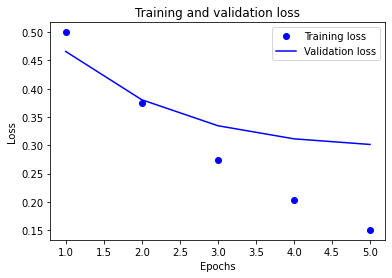

In [18]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

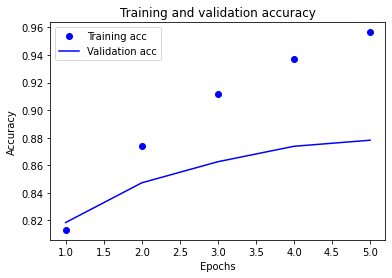

In [19]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()